In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Dataset and view
Mall_Customer = pd.read_csv("/kaggle/input/mall-customers/Mall_Customers.csv")
Mall_Customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Check missing values and data types of columns 
print("\nMissing Values:")
print(Mall_Customer.isnull().sum())
print("\nData Types:")
print(Mall_Customer.dtypes)


Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Data Types:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [4]:
# Feature Selection
X = Mall_Customer[['Annual Income (k$)', 'Spending Score (1-100)']]

In [5]:
# Feature Scaling to make it same range
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

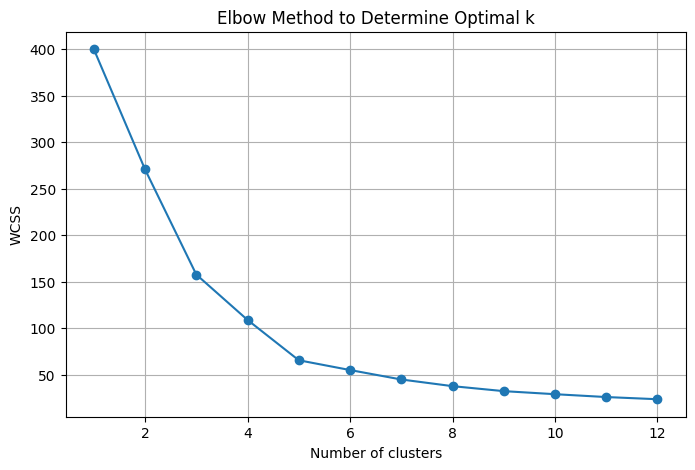

In [6]:
# Finding Optimal k using Elbow Method
wcss = []
k_range = range(1, 13)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [7]:
# Silhouette Score (Optional Validation)

print("\nSilhouette Scores:")
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k = {k}: Silhouette Score = {score:.3f}")


Silhouette Scores:
k = 2: Silhouette Score = 0.315
k = 3: Silhouette Score = 0.467
k = 4: Silhouette Score = 0.494
k = 5: Silhouette Score = 0.555
k = 6: Silhouette Score = 0.540
k = 7: Silhouette Score = 0.526
k = 8: Silhouette Score = 0.456


In [8]:
# Apply K-Means Clustering
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to original DataFrame
Mall_Customer['Cluster'] = y_kmeans


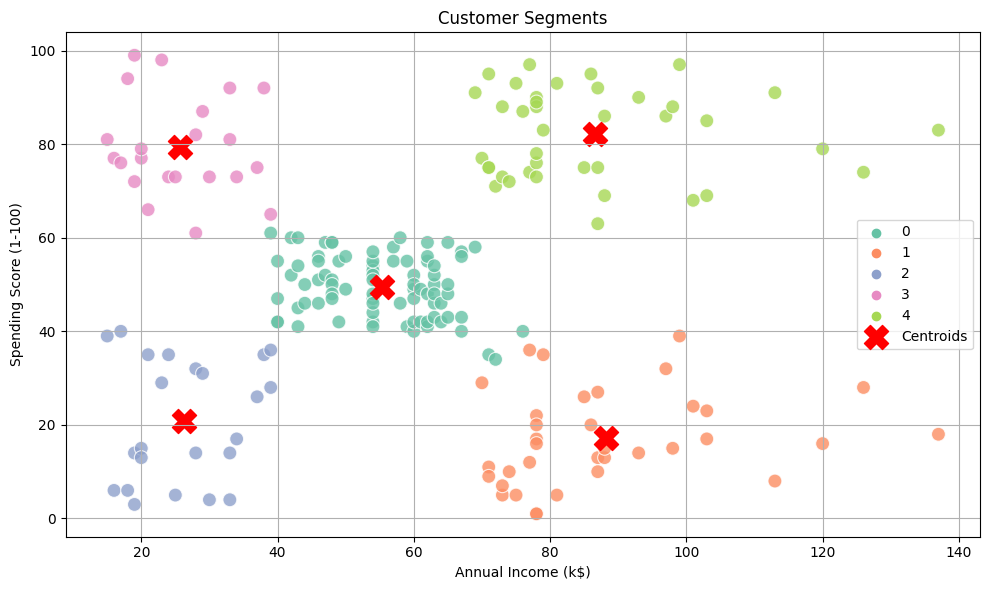

In [9]:
# Visualizing Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='Set2', data=Mall_Customer, s=100, alpha=0.8)

# Plot centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='X')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
Mall_Customer.to_csv("Segmented_Customers.csv", index=False)
print("\nSegmented data saved as 'Segmented_Customers.csv'")


Segmented data saved as 'Segmented_Customers.csv'


In [11]:
Segmented_Customers = pd.read_csv("/kaggle/working/Segmented_Customers.csv")
Segmented_Customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
